Simulations in this notebook give a picture of how the oracle would behave if it was updated each time liquidity moved around in the pool. This is very expensive as each update costs about 80k gas.

In [30]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [31]:
from cvx_synth_asset_oracle import ConvexSynthAssetOracleLite

In [32]:
save_file_dir = "../data/cvxcrv_pool_data.csv"
pool_data = pd.DataFrame()
if os.path.exists(save_file_dir):
    pool_data = pd.read_csv(save_file_dir)
pool_data

,block,crvusd_price,ethusd_price,cvxcrv_crv_1,cvxcrv_crv_10,cvxcrv_crv_100,cvxcrv_crv_1000,cvxcrv_crv_10000,cvxcrv_pool_balance,crv_pool_balance
0,13056869,2.070921,3066.626358,0.996924,9.132532,10.082833,10.084830,10.084850,9.900095e+00,1.010000e+01
1,13056984,2.052405,3041.060346,0.994729,9.947286,99.472498,994.688360,9943.196023,5.520935e+05,4.564644e+05
2,13058684,2.121912,3175.374060,0.996586,9.965855,99.658231,996.550167,9962.276366,5.812792e+05,5.272852e+05
3,13058701,2.121912,3175.374060,0.995442,9.954414,99.543810,995.405334,9950.759193,5.971679e+05,5.114479e+05
4,13058709,2.121912,3175.374060,0.991493,9.914924,99.148867,991.451563,9910.763473,6.485631e+05,4.603481e+05
...,...,...,...,...,...,...,...,...,...,...
26455,14074911,2.905584,2443.890000,0.938093,9.380926,93.809212,938.087156,9380.374319,4.418963e+07,1.023548e+07
26456,14074918,2.905584,2443.890000,0.938180,9.381802,93.817967,938.174709,9381.250761,4.418170e+07,1.024294e+07
26457,14074920,2.905584,2443.890000,0.938219,9.382193,93.821878,938.213824,9381.642317,4.417815e+07,1.024627e+07
26458,14075136,2.937313,2417.255604,0.938205,9.382050,93.820453,938.199572,9381.499686,4.418244e+07,1.024575e+07


In [33]:
cvxcrv_oracle = ConvexSynthAssetOracleLite()
print(f"Initial EMA Swap Rate: {cvxcrv_oracle.ema_swap_rate}")

verbose = False

pool_data['ema_swap_rate'] = 0
pool_data['swap_rate'] = 0
pool_data['crvusd_chainlink_price'] = 0
pool_data['cvxcrvusd_spot_price'] = 0
pool_data['cvxcrvusd_oracle_price'] = 0

for idx, row in pool_data.iterrows():

    cvxcrv_to_crv_rate = row.cvxcrv_crv_1
    chainlink_crvusd_price = row.crvusd_price
    cvxcrv_oracle.update_ema_rate(int(cvxcrv_to_crv_rate * 1e18))

    cvxcrv_usd_oracle_price = cvxcrv_oracle.latestAnswer(int(chainlink_crvusd_price * 1E8))  # need to multiply to get 8 decimal precision int

    pool_data.loc[idx, 'ema_swap_rate'] = cvxcrv_oracle.ema_swap_rate * 1e-18
    pool_data.loc[idx, 'crvusd_chainlink_price'] = chainlink_crvusd_price
    pool_data.loc[idx, 'cvxcrvusd_oracle_price'] = cvxcrv_usd_oracle_price * 1e-18
    pool_data.loc[idx, 'cvxcrvusd_spot_price'] = cvxcrv_to_crv_rate * chainlink_crvusd_price
    pool_data.loc[idx, 'swap_rate'] = cvxcrv_to_crv_rate

    if verbose:
        print(f"Received {row.cvxcrv_crv_10000} CRV for 1 cvxCRV.")
        print(f"EMA Swap Rate: {cvxcrv_oracle.ema_swap_rate * 1e-18}")
        print(f"CRVUSD Chainlink Price: {chainlink_crvusd_price} USD")
        print(f"cvxCRVUSD Chainlink Price: {cvxcrv_usd_oracle_price * 1e-18} USD")

        print()

Initial EMA Swap Rate: 0


In [34]:
pool_data['peg_ratio'] = pool_data.crv_pool_balance / pool_data.cvxcrv_pool_balance
pool_data

,block,crvusd_price,ethusd_price,cvxcrv_crv_1,cvxcrv_crv_10,cvxcrv_crv_100,cvxcrv_crv_1000,cvxcrv_crv_10000,cvxcrv_pool_balance,crv_pool_balance,ema_swap_rate,swap_rate,crvusd_chainlink_price,cvxcrvusd_spot_price,cvxcrvusd_oracle_price,peg_ratio
0,13056869,2.070921,3066.626358,0.996924,9.132532,10.082833,10.084830,10.084850,9.900095e+00,1.010000e+01,0.996924,0.996924,2.070921,2.064550,2.064550,1.020192
1,13056984,2.052405,3041.060346,0.994729,9.947286,99.472498,994.688360,9943.196023,5.520935e+05,4.564644e+05,0.995826,0.994729,2.052405,2.041587,2.043840,0.826788
2,13058684,2.121912,3175.374060,0.996586,9.965855,99.658231,996.550167,9962.276366,5.812792e+05,5.272852e+05,0.996080,0.996586,2.121912,2.114667,2.113593,0.907112
3,13058701,2.121912,3175.374060,0.995442,9.954414,99.543810,995.405334,9950.759193,5.971679e+05,5.114479e+05,0.995920,0.995442,2.121912,2.112239,2.113254,0.856456
4,13058709,2.121912,3175.374060,0.991493,9.914924,99.148867,991.451563,9910.763473,6.485631e+05,4.603481e+05,0.995035,0.991493,2.121912,2.103860,2.111376,0.709797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26455,14074911,2.905584,2443.890000,0.938093,9.380926,93.809212,938.087156,9380.374319,4.418963e+07,1.023548e+07,0.975921,0.938093,2.905584,2.725707,2.835621,0.231626
26456,14074918,2.905584,2443.890000,0.938180,9.381802,93.817967,938.174709,9381.250761,4.418170e+07,1.024294e+07,0.975920,0.938180,2.905584,2.725961,2.835617,0.231837
26457,14074920,2.905584,2443.890000,0.938219,9.382193,93.821878,938.213824,9381.642317,4.417815e+07,1.024627e+07,0.975919,0.938219,2.905584,2.726075,2.835613,0.231931
26458,14075136,2.937313,2417.255604,0.938205,9.382050,93.820453,938.199572,9381.499686,4.418244e+07,1.024575e+07,0.975917,0.938205,2.937313,2.755802,2.866574,0.231896


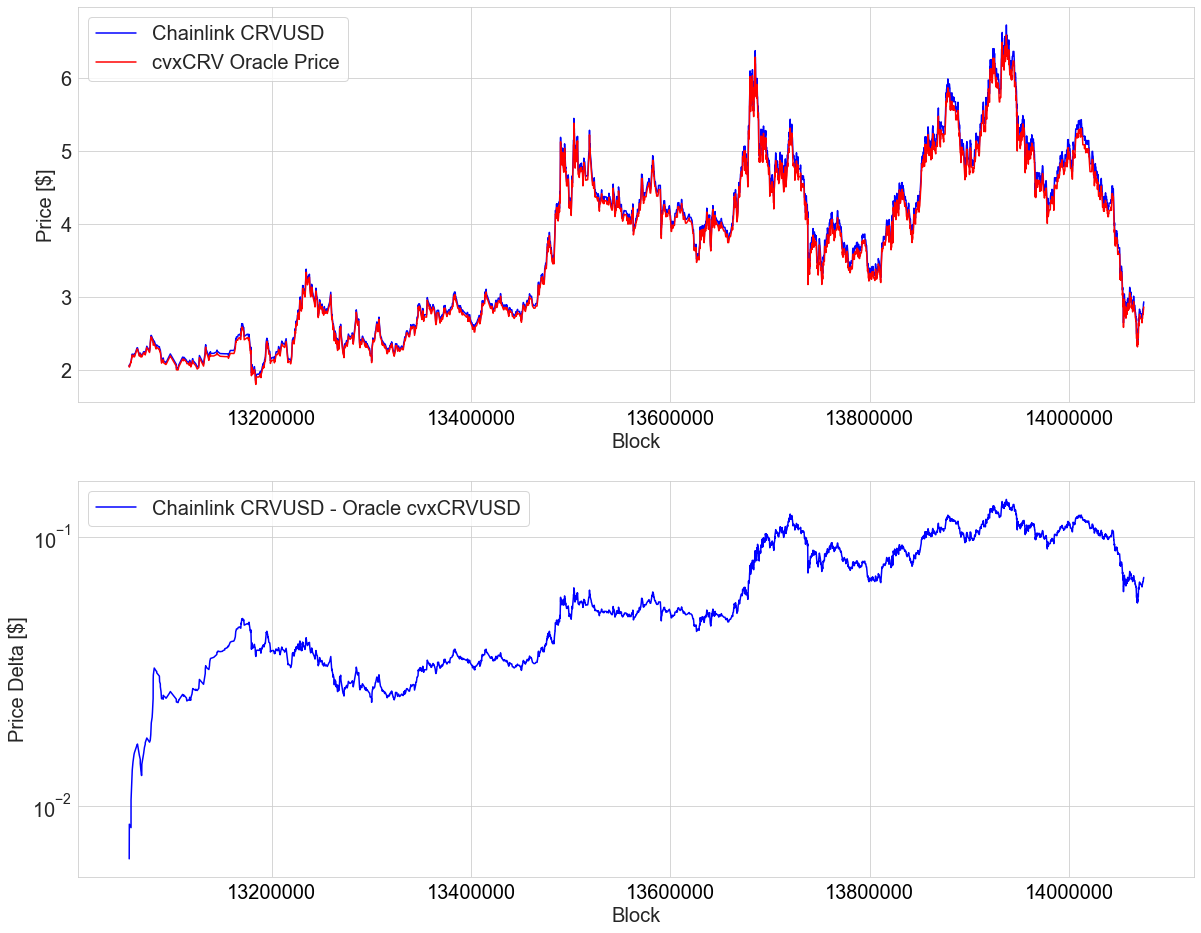

In [35]:
fig, axes = plt.subplots(2, 1, figsize=(20, 16))

ax = axes[0]
ax.plot(
    pool_data.block,
    pool_data.crvusd_chainlink_price,
    color='blue',
    # lw=5,
    label='Chainlink CRVUSD'
)
ax.plot(
    pool_data.block,
    pool_data.cvxcrvusd_oracle_price,
    color='red',
    label='cvxCRV Oracle Price'
)

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Price [$]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)


ax = axes[1]
ax.plot(
    pool_data.block,
    pool_data.crvusd_chainlink_price - pool_data.cvxcrvusd_oracle_price,
    color='blue',
    # lw=5,
    label='Chainlink CRVUSD - Oracle cvxCRVUSD'
)

ax.set_yscale('log')

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Price Delta [$]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)

There's an oracle warm-up period, during which the oracle price becomes more robust against spot as the oracle updates average up the EMA swap rate. How long that lasts gives an idea on how reflexive the oracle price is (in a way):

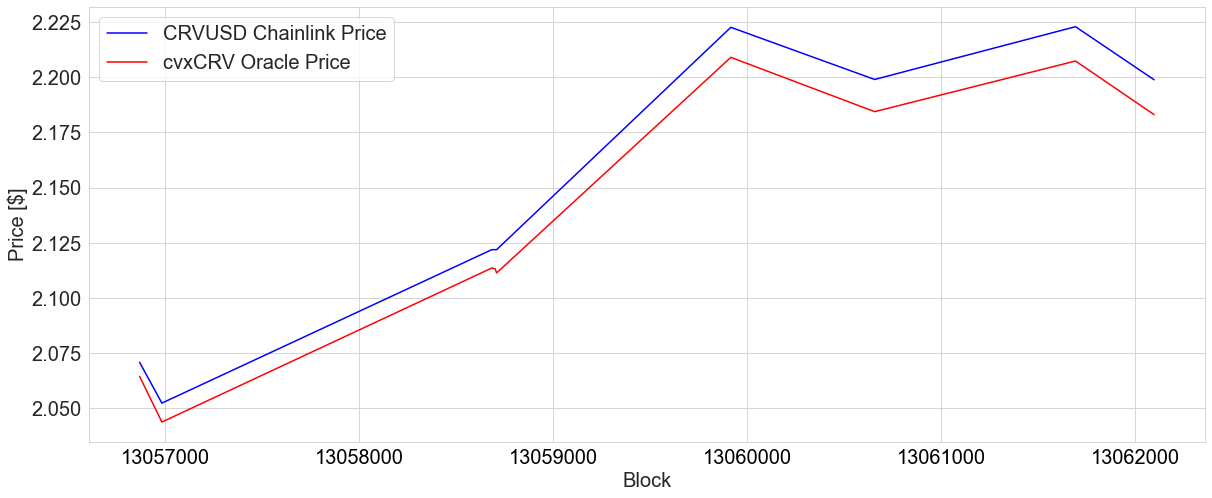

In [36]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

oracle_warmup_data = pool_data[pool_data.block < 13063000]

ax.plot(
    oracle_warmup_data.block,
    oracle_warmup_data.crvusd_chainlink_price,
    color='blue',
    label='CRVUSD Chainlink Price'
)
ax.plot(
    oracle_warmup_data.block,
    oracle_warmup_data.cvxcrvusd_oracle_price,
    color='red',
    label='cvxCRV Oracle Price'
)

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Price [$]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)

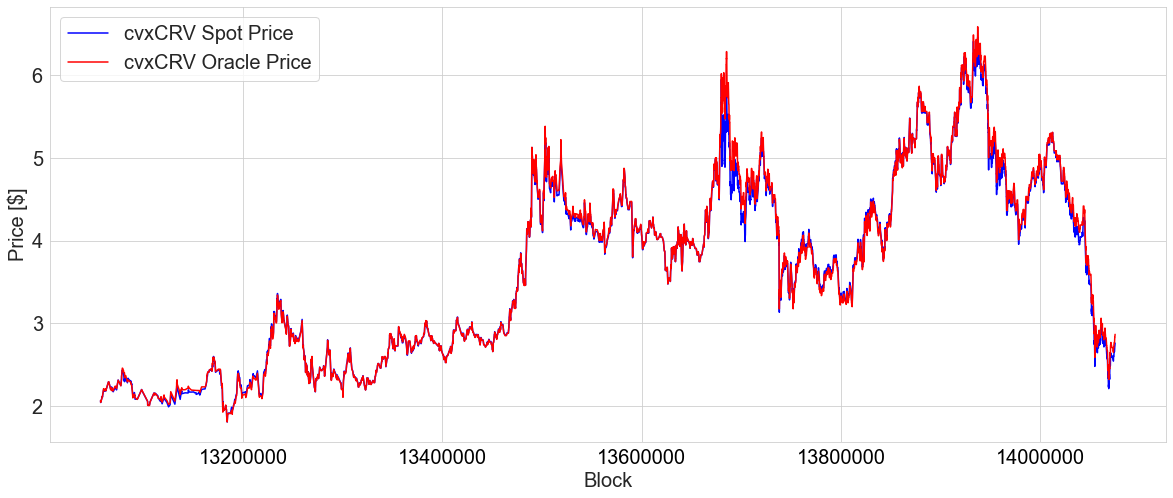

In [37]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.plot(
    pool_data.block,
    pool_data.cvxcrvusd_spot_price,
    color='blue',
    # lw=5,
    label='cvxCRV Spot Price'
)
ax.plot(
    pool_data.block,
    pool_data.cvxcrvusd_oracle_price,
    color='red',
    label='cvxCRV Oracle Price'
)

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Price [$]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)

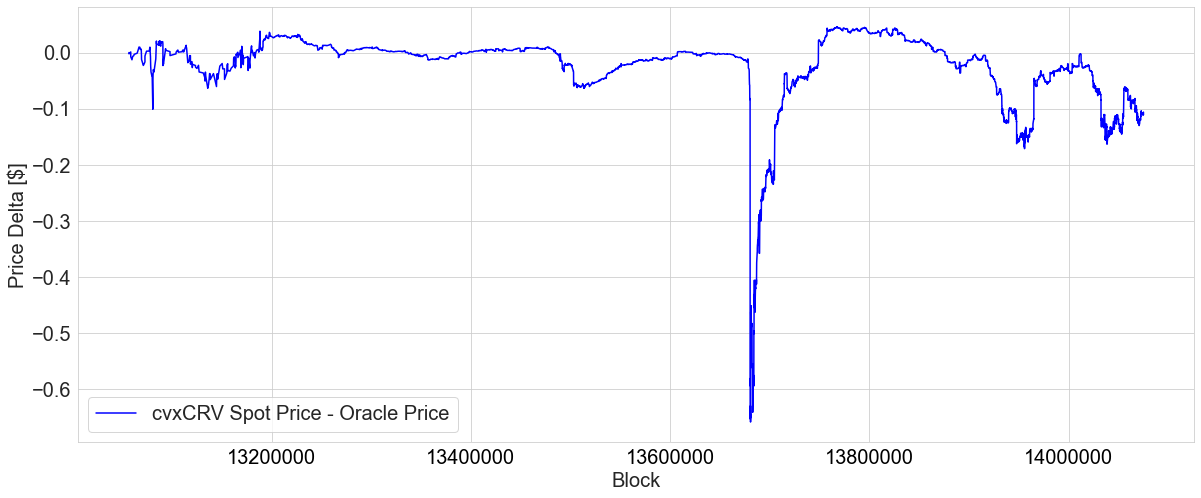

In [38]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.plot(
    pool_data.block,
    pool_data.cvxcrvusd_spot_price - pool_data.cvxcrvusd_oracle_price,
    color='blue',
    # lw=5,
    label='cvxCRV Spot Price - Oracle Price'
)

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Price Delta [$]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)

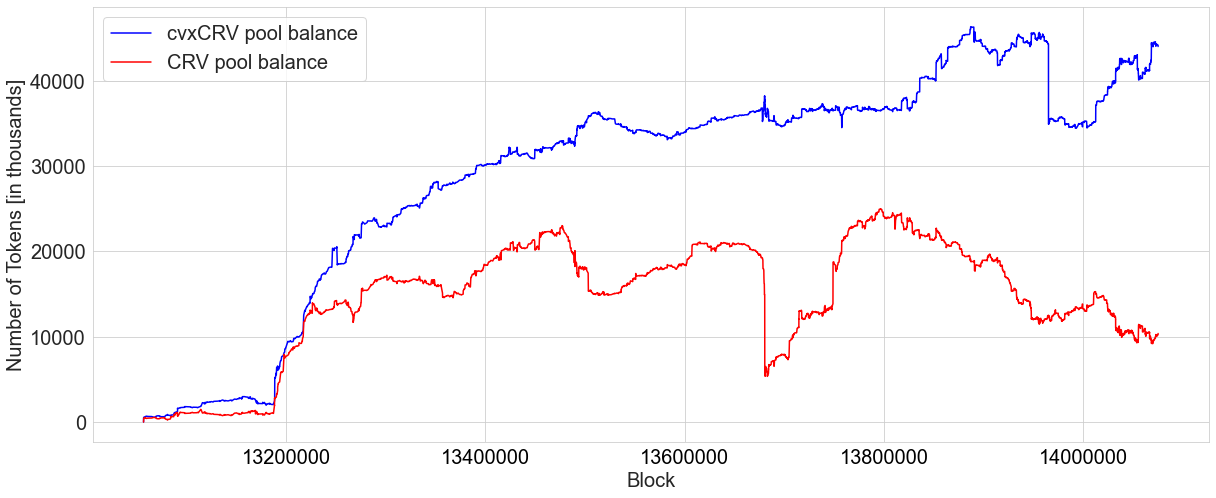

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

ax.plot(
    pool_data.block,
    pool_data.cvxcrv_pool_balance * 1e-3,
    color='blue',
    # lw=5,
    label='cvxCRV pool balance'
)
ax.plot(
    pool_data.block,
    pool_data.crv_pool_balance * 1E-3,
    color='red',
    label='CRV pool balance'
)

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Number of Tokens [in thousands]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

Zooming pool de-peg incident around 13700000 block number.

In [40]:
df_pool_data_snippet = pool_data[(pool_data.block > 13675000) & (pool_data.block < 13725000)]

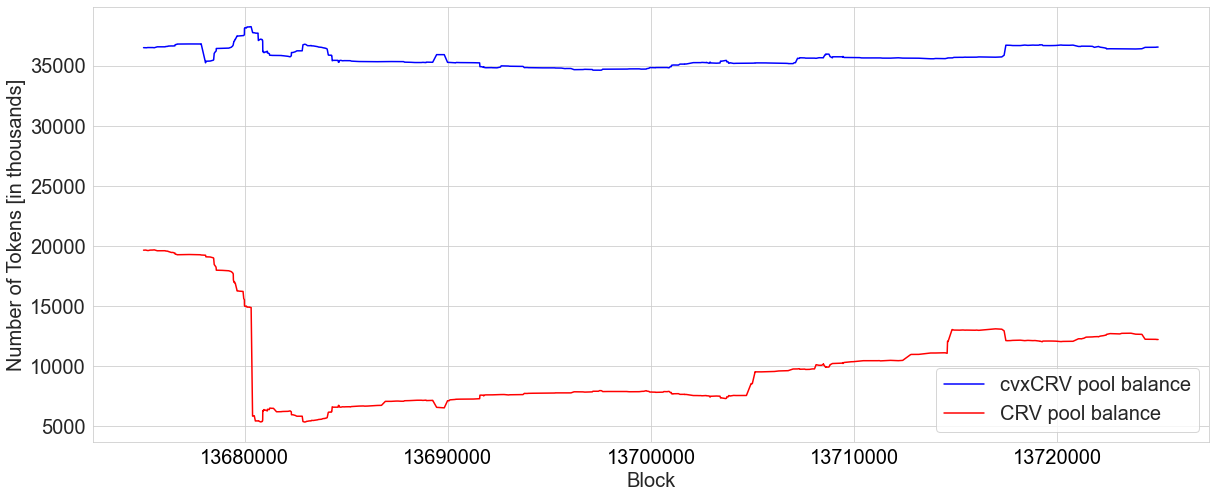

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

ax.plot(
    df_pool_data_snippet.block,
    df_pool_data_snippet.cvxcrv_pool_balance * 1e-3,
    color='blue',
    # lw=5,
    label='cvxCRV pool balance'
)
ax.plot(
    df_pool_data_snippet.block,
    df_pool_data_snippet.crv_pool_balance * 1E-3,
    color='red',
    label='CRV pool balance'
)

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Number of Tokens [in thousands]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

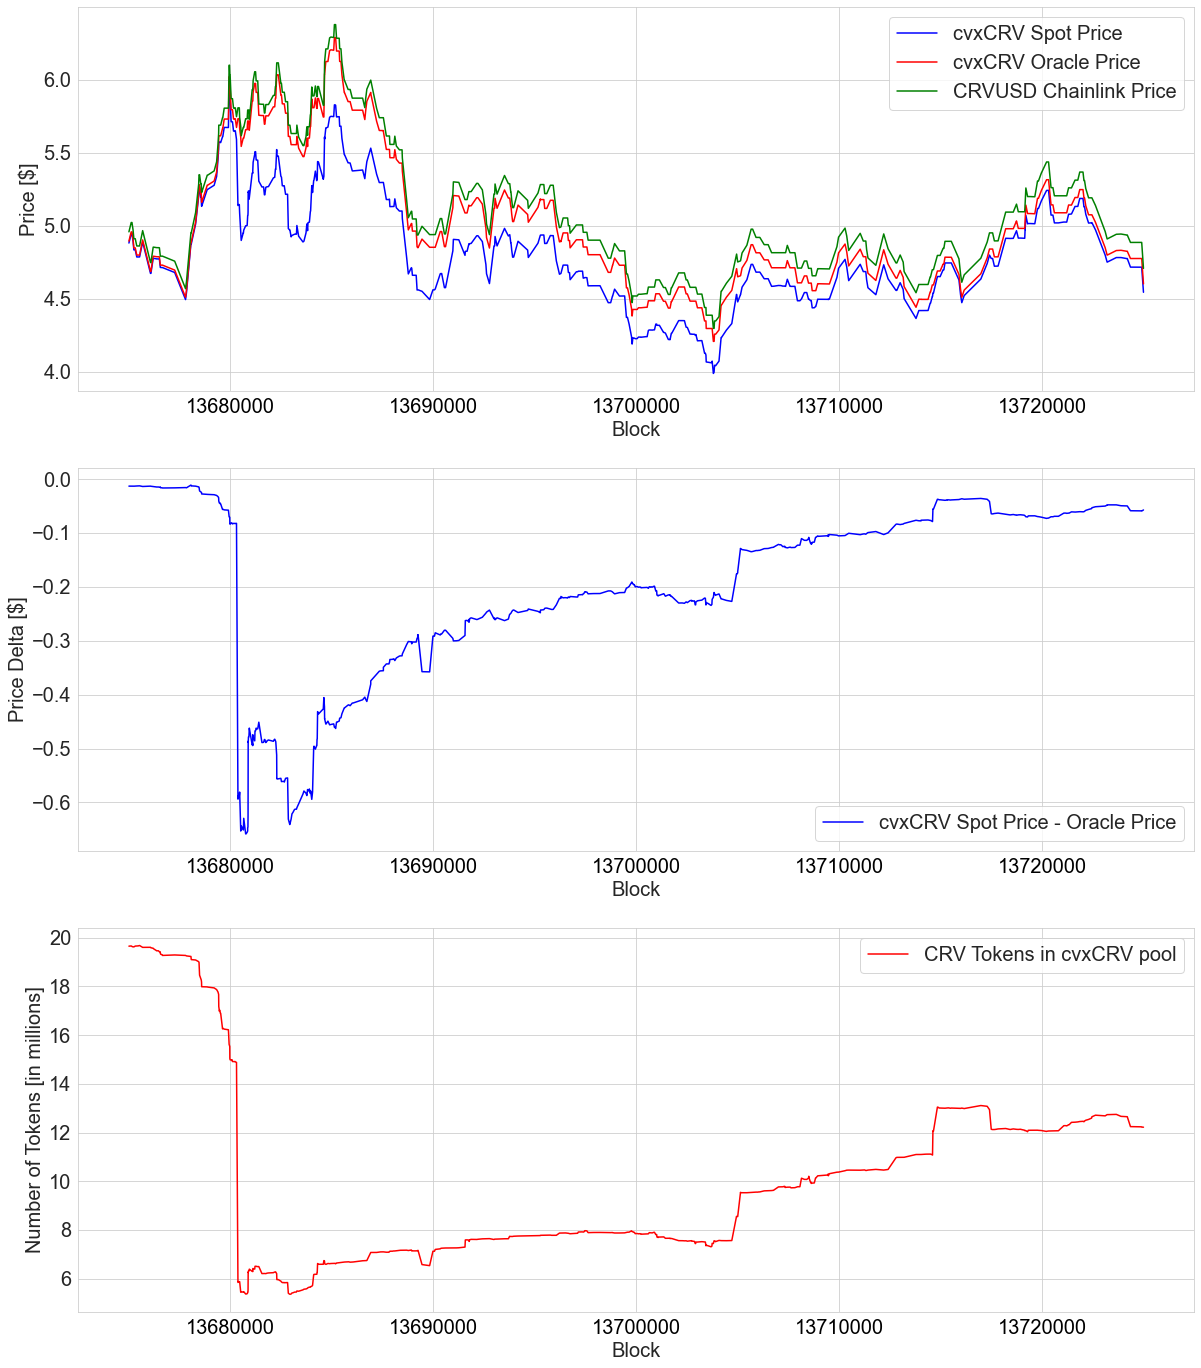

In [42]:
fig, axes = plt.subplots(3, 1, figsize=(20, 24))

df_pool_data_snippet = pool_data[(pool_data.block > 13675000) & (pool_data.block < 13725000)]

ax = axes[0]
ax.plot(
    df_pool_data_snippet.block,
    df_pool_data_snippet.cvxcrvusd_spot_price,
    color='blue',
    # lw=5,
    label='cvxCRV Spot Price'
)
ax.plot(
    df_pool_data_snippet.block,
    df_pool_data_snippet.cvxcrvusd_oracle_price,
    color='red',
    label='cvxCRV Oracle Price'
)
ax.plot(
    df_pool_data_snippet.block,
    df_pool_data_snippet.crvusd_chainlink_price,
    color='green',
    label='CRVUSD Chainlink Price'
)

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Price [$]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)


ax = axes[1]
ax.plot(
    df_pool_data_snippet.block,
    df_pool_data_snippet.cvxcrvusd_spot_price - df_pool_data_snippet.cvxcrvusd_oracle_price,
    color='blue',
    label='cvxCRV Spot Price - Oracle Price'
)

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Price Delta [$]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)


ax = axes[2]
ax.plot(
    df_pool_data_snippet.block,
    df_pool_data_snippet.crv_pool_balance * 1e-6,
    color='red',
    # lw=5,
    label='CRV Tokens in cvxCRV pool'
)

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Number of Tokens [in millions]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

Another instance where a large amount of cvxCRV was removed from the pool:

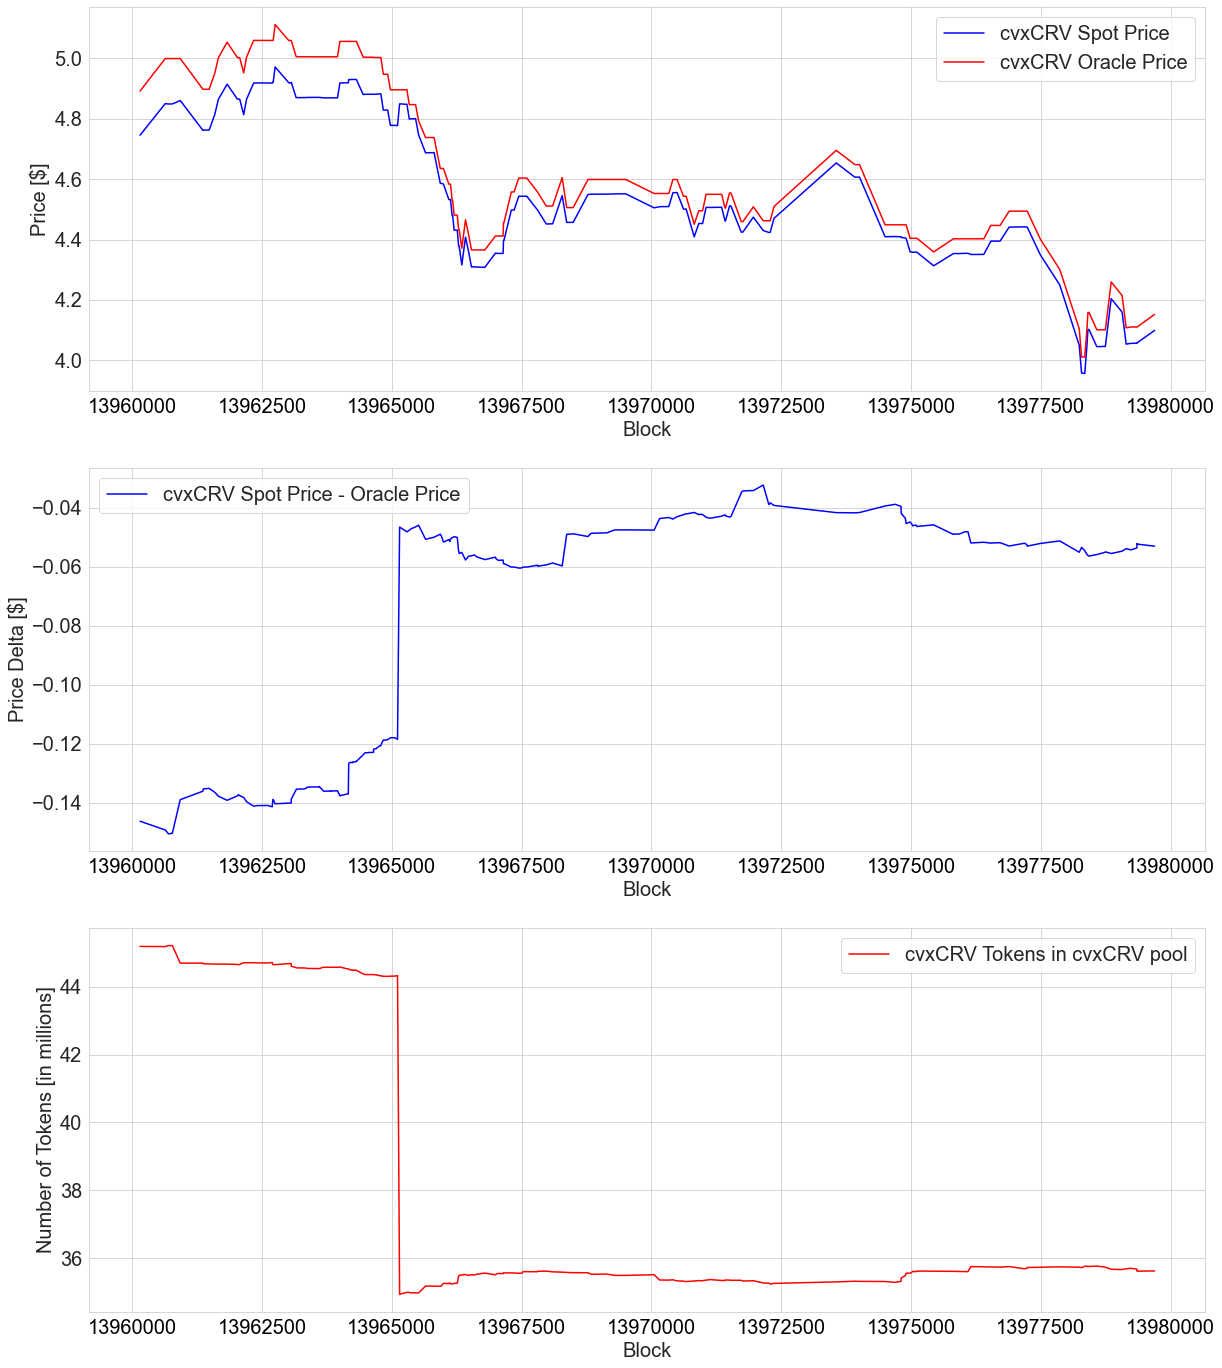

In [43]:
fig, axes = plt.subplots(3, 1, figsize=(20, 24))

df_pool_data_snippet = pool_data[(pool_data.block > 13960000) & (pool_data.block < 13980000)]

ax = axes[0]
ax.plot(
    df_pool_data_snippet.block,
    df_pool_data_snippet.cvxcrvusd_spot_price,
    color='blue',
    # lw=5,
    label='cvxCRV Spot Price'
)
ax.plot(
    df_pool_data_snippet.block,
    df_pool_data_snippet.cvxcrvusd_oracle_price,
    color='red',
    label='cvxCRV Oracle Price'
)

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Price [$]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)


ax = axes[1]
ax.plot(
    df_pool_data_snippet.block,
    df_pool_data_snippet.cvxcrvusd_spot_price - df_pool_data_snippet.cvxcrvusd_oracle_price,
    color='blue',
    label='cvxCRV Spot Price - Oracle Price'
)

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Price Delta [$]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)


ax = axes[2]
ax.plot(
    df_pool_data_snippet.block,
    df_pool_data_snippet.cvxcrv_pool_balance * 1e-6,
    color='red',
    # lw=5,
    label='cvxCRV Tokens in cvxCRV pool'
)

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Number of Tokens [in millions]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

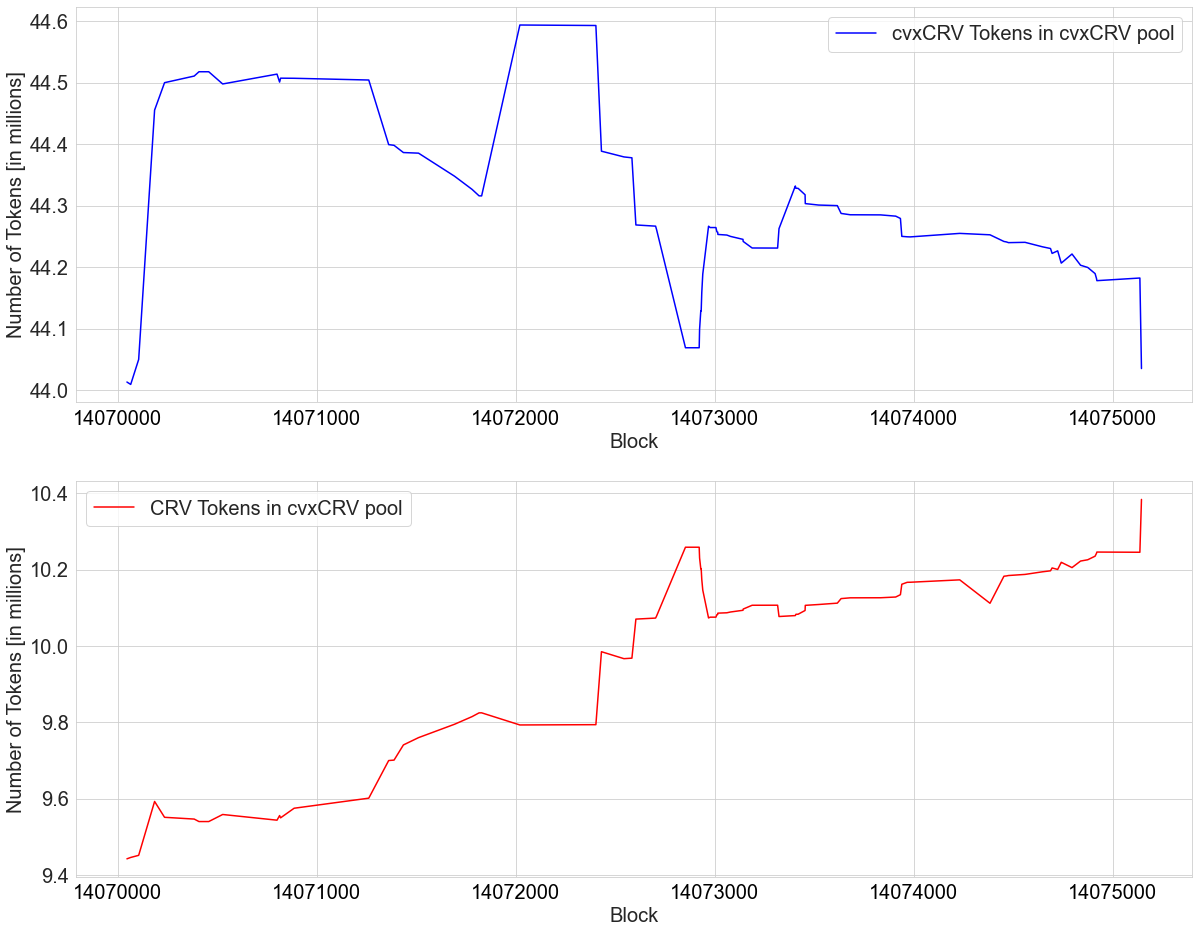

In [49]:
fig, axes = plt.subplots(2, 1, figsize=(20, 16))

df_pool_data_snippet = pool_data[(pool_data.block > 14070000)]

ax = axes[0]
ax.plot(
    df_pool_data_snippet.block,
    df_pool_data_snippet.cvxcrv_pool_balance * 1e-6,
    color='blue',
    label='cvxCRV Tokens in cvxCRV pool'
)

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Number of Tokens [in millions]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

ax = axes[1]
ax.plot(
    df_pool_data_snippet.block,
    df_pool_data_snippet.crv_pool_balance * 1e-6,
    color='red',
    # lw=5,
    label='CRV Tokens in cvxCRV pool'
)

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Number of Tokens [in millions]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)